<a href="https://colab.research.google.com/github/basharbme/3D-Pelvic-Bone-cancer-classification/blob/main/3dClassification_Pelvic_Bone_TumourFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mig
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/training_data/'
classes = os.listdir(PATH)



In [ ]:
PATH = '/content/drive/MyDrive/training_data/'
classes = os.listdir(PATH)

c1_path=os.path.join(PATH, classes[1])
c1_data_path=[os.path.join(c1_path, img) for img in os.listdir(c1_path) ]
len(c1_data_path)

for i in range(0,5):
    img = mig.imread(c1_data_path[i])

    print(i,img.shape)

0 (594, 812, 4)
1 (595, 815, 4)
2 (595, 814, 4)
3 (599, 812, 4)
4 (595, 814, 4)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IDG = ImageDataGenerator(rescale = 1./255 )
train_data = IDG.flow_from_directory(PATH,target_size=(256,256),batch_size=8)

Found 133 images belonging to 3 classes.


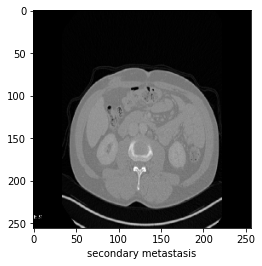

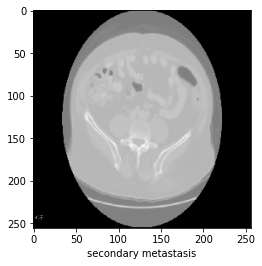

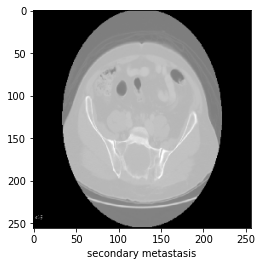

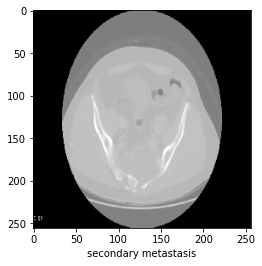

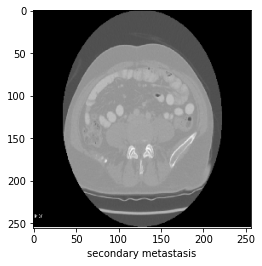

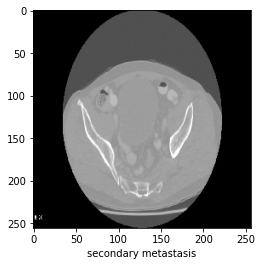

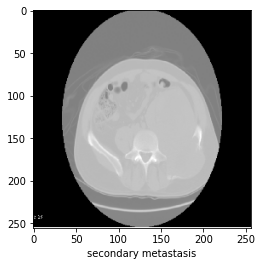

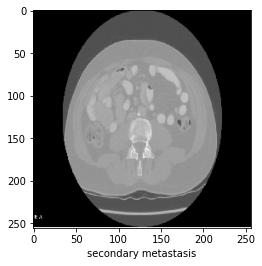

In [ ]:
# Displaying few images
sample_x,sample_y = next(train_data)
for x,y in zip( sample_x,sample_y ):
  plt.imshow(x)
  plt.xlabel(classes[y.argmax()])
  plt.show()

In [ ]:
# Preparing Model
img_shape=(256,256,3)

model = keras.Sequential(name='RGBimg_Classify_Net')
model.add(keras.layers.Conv2D(128,3,input_shape=(img_shape),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(len(classes),activation='softmax'))

model.summary()

Model: "RGBimg_Classify_Net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 63, 63, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 128)       512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)  

In [ ]:
# Training Model
model.compile(optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

hist = model.fit(train_data,epochs=10)

Epoch 1/10
17/17 [==============================] - 2s 107ms/step - loss: 1.6031 - accuracy: 0.5940
Epoch 2/10
17/17 [==============================] - 2s 105ms/step - loss: 0.8573 - accuracy: 0.6917
Epoch 3/10
17/17 [==============================] - 2s 103ms/step - loss: 0.4751 - accuracy: 0.8421
Epoch 4/10
17/17 [==============================] - 2s 104ms/step - loss: 0.4919 - accuracy: 0.8195
Epoch 5/10
17/17 [==============================] - 2s 102ms/step - loss: 0.3484 - accuracy: 0.8872
Epoch 6/10
17/17 [==============================] - 2s 103ms/step - loss: 0.1924 - accuracy: 0.9323
Epoch 7/10
17/17 [==============================] - 2s 104ms/step - loss: 0.2265 - accuracy: 0.9398
Epoch 8/10
17/17 [==============================] - 2s 100ms/step - loss: 0.1140 - accuracy: 0.9699
Epoch 9/10
17/17 [==============================] - 2s 106ms/step - loss: 0.2301 - accuracy: 0.9398
Epoch 10/10
17/17 [==============================] - 2s 101ms/step - loss: 0.1242 - accuracy: 0.9398

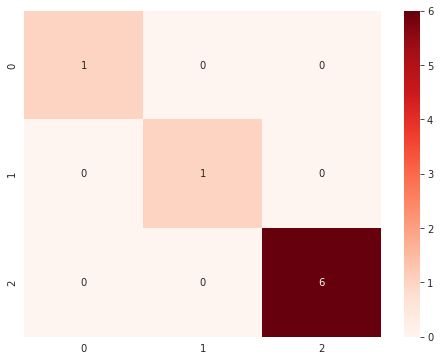

In [ ]:
# Prediction of images
sam_x,sam_y = next(train_data) 
pred_ = model.predict(sam_x)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
pred,y =[],[]

for i in range(len(sam_x)):
    t1,t2 = pred_[i].argmax(), sam_y[i].argmax()
    pred.append(t1)
    y.append(t2)

import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y,pred),annot = True, fmt = 'd', cmap = 'Reds');

In [ ]:
# Finding Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%',"\n")

Accuracy on the test set: 100.00% 



In [ ]:
# Classification report
from sklearn.metrics import classification_report
class_report = classification_report(y, pred, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [ ]:
acc = hist.history['accuracy']
test_acc = accuracy_score(y, pred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
precision, recall, f1score, _ = precision_recall_fscore_support(y, pred, average='weighted')
auc = roc_auc_score

In [ ]:
print("Train Accuracy:\t", acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9398496150970459
Test Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
F1 Score:	 1.0
AUC:		 <function roc_auc_score at 0x7fbcb90528c0>


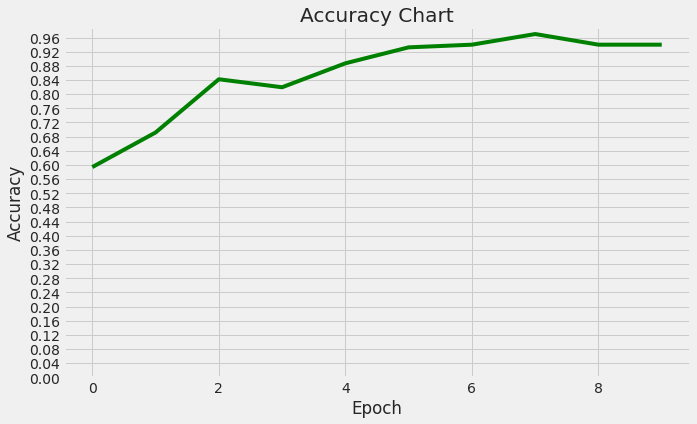

In [ ]:
# Model Accuracy Visualisation
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='accuracy',color='green')
plt.title('Accuracy Chart')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.04))
plt.show()

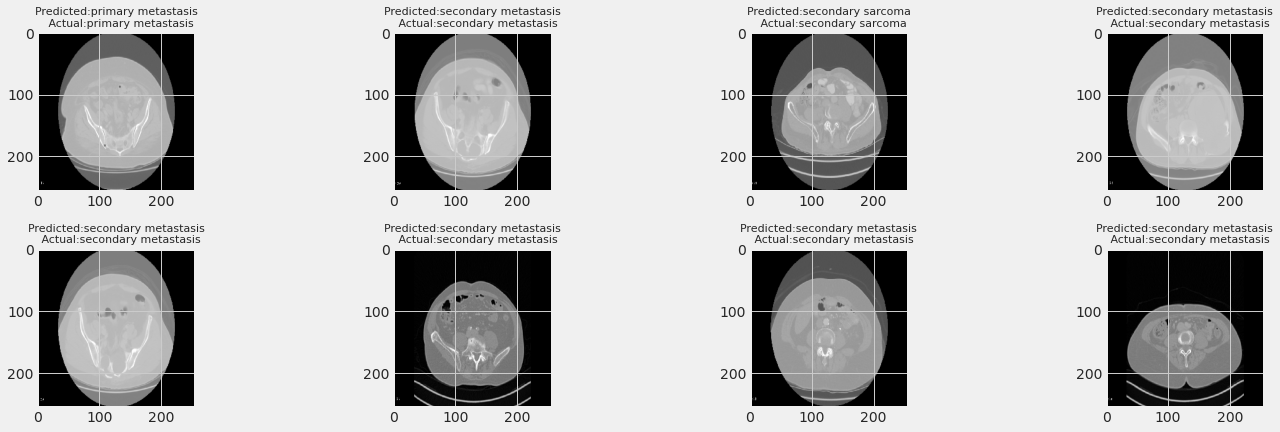

In [ ]:
# Prediction
plt.figure(figsize=(20,12))
for i in range(len(sam_x)):
    plt.subplot(4,4,i+1)
    plt.imshow(sam_x[i])
    title_ = 'Predicted:' + classes[pred[i]]+ '\n   Actual:' + classes[y[i]]
    plt.title(title_,size=11)
plt.tight_layout()
plt.show()